In [1]:
import epa.model.workflow
adaboost = epa.model.workflow.violation_state_adaboost()
randomforest = epa.model.workflow.violation_state()
logistic = epa.model.workflow.violation_state_logistic()
#gradient = epa.model.workflow.violation_state_gradient()


from drain import step
step.OUTPUTDIR = '/mnt/data/nysdec/epa-ny/drain/'

step.load(adaboost)
step.load(randomforest)
step.load(logistic)
#step.load(gradient)

[FitPredict(inputs=[Construct(C=0.1, __class_name__='sklearn.linear_model.LogisticRegression',
      penalty='l1'), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train_years=2, year=2013)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(C=0.1, __class_name__='sklearn.linear_model.LogisticRegression',
      penalty='l1'), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train

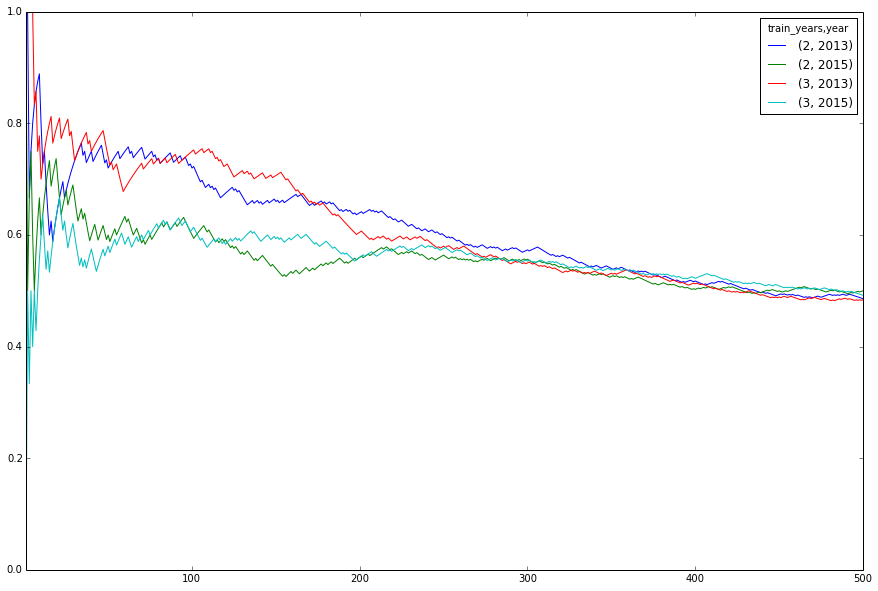

In [5]:
from drain import explore, model
df_adaboost = explore.to_dataframe(adaboost)
df_adaboost

df_randomforest = explore.to_dataframe(randomforest)
df_randomforest

df_logistic = explore.to_dataframe(logistic)
df_logistic

#df_gradient = explore.to_dataframe(gradient)
#df_gradient

adaboost[0].get_result()
randomforest[0].get_result()
logistic[0].get_result()
#gradient[0].get_result()

%matplotlib inline
explore.apply(df_randomforest, model.precision_series, k=500, dropna=True).plot(figsize=(15,10))